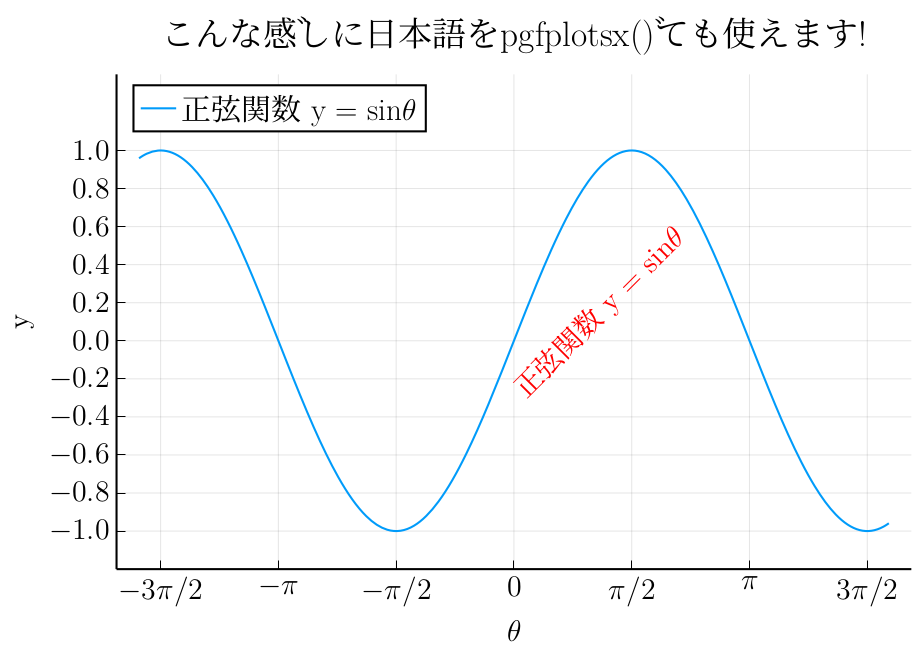

In [1]:
# `@eval Plots pgfx_sanitize_string(s::AbstractString) = s` としていない場合には
# 「じ」「で」などの濁点の位置がおかしくなる。TeXのコードでは以下のようになってしまう。
# 
# title={$こ$$ん$$な$$感$$じ$$に$$日$$本$$語$$を$pgfplotsx()$で$$も$$使$$え$$ま$$す$!}
# \addlegendentry {$正$$弦$$関$$数$ y = sin\theta}

using LaTeXStrings
using Plots
default(fmt=:png)

pgfplotsx()
PGFPlotsX.CUSTOM_PREAMBLE=[raw"\usepackage{luatexja}"]

plot(sin; label=raw"正弦関数 y = sin\theta", legendfontsize=15)
plot!(xguide=raw"\theta", yguide=raw"y", guidefontsize=14)
plot!(xtick=(-2π:π/2:2π, [L"-2\pi", L"-3\pi/2", L"-\pi", L"-\pi/2", L"0", L"\pi/2", L"\pi", L"3\pi/2", L"2\pi"]),
    ytick=-1:0.2:1, tickfontsize=14)
plot!(ylim=(-1.2, 1.4), legend=:topleft)
annotate!(0, -0.3, text(raw"正弦関数 y = sin\theta", :left, 14, :red, rotation=45))
title!(raw"こんな感じに日本語をpgfplotsx()でも使えます!", titlefontsize=17)
plot!(tex_output_standalone=true)
savefig("pgfplotsx-ja-standalone-inappropriate.tex")
plot!()

In [2]:
; cat pgfplotsx-ja-standalone-inappropriate.tex

\RequirePackage{luatex85}
\documentclass[tikz]{standalone}
% Default preamble
\usepackage{pgfplots}
\pgfplotsset{compat=newest}
\usepgfplotslibrary{groupplots}
\usepgfplotslibrary{polar}
\usepgfplotslibrary{smithchart}
\usepgfplotslibrary{statistics}
\usepgfplotslibrary{dateplot}
\usepgfplotslibrary{ternary}
% Custom preamble from global variable:
\usepackage{luatexja}
\usetikzlibrary{arrows.meta}
\usetikzlibrary{backgrounds}
\usepgfplotslibrary{patchplots}
\usepgfplotslibrary{fillbetween}
\pgfplotsset{%
    layers/standard/.define layer set={%
        background,axis background,axis grid,axis ticks,axis lines,axis tick labels,pre main,main,axis descriptions,axis foreground%
    }{
        grid style={/pgfplots/on layer=axis grid},%
        tick style={/pgfplots/on layer=axis ticks},%
        axis line style={/pgfplots/on layer=axis lines},%
        label style={/pgfplots/on layer=axis descriptions},%
        legend style={/pgfplots/on layer=axis descriptions},%
        title style={/p

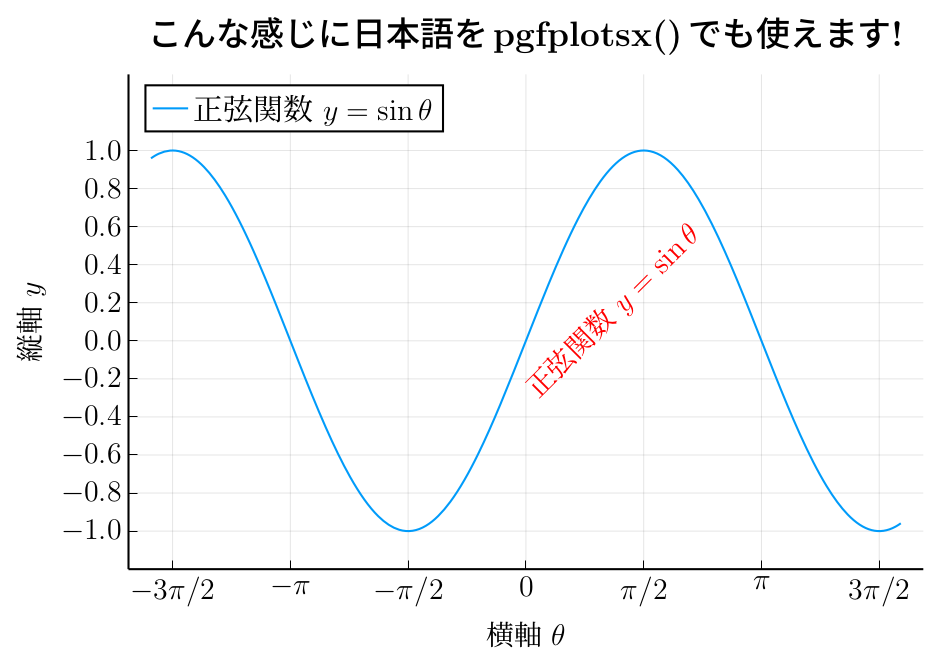

In [3]:
using LaTeXStrings
using Plots
default(fmt=:png)

pgfplotsx()
PGFPlotsX.CUSTOM_PREAMBLE=[raw"\usepackage{luatexja}"]
@eval Plots pgfx_sanitize_string(s::AbstractString) = s

# @eval Plots function original_pgfx_sanitize_string(s::AbstractString)
#     # regular latex text with the following special characters won't compile if not sanitized (escaped)
#     sanitized = replace(s, r"\\?([#%_&\{\}\$])" => s"\\\1")
#     map(collect(sanitized)) do c
#         if isascii(c)
#             c
#         else
#             Latexify.latexify(c; parse = false)
#         end
#     end |> join |> LaTeXString
# end
# @eval Plots pgfx_sanitize_string(s::AbstractString) = original_pgfx_sanitize_string(s)

plot(sin; label=raw"正弦関数 $y = \sin\theta$", legendfontsize=15)
plot!(xguide=raw"横軸 $\theta$", yguide=raw"縦軸 $y$", guidefontsize=14)
plot!(xtick=(-2π:π/2:2π, [L"-2\pi", L"-3\pi/2", L"-\pi", L"-\pi/2", L"0", L"\pi/2", L"\pi", L"3\pi/2", L"2\pi"]),
    ytick=-1:0.2:1, tickfontsize=14)
plot!(ylim=(-1.2, 1.4), legend=:topleft)
annotate!(0, -0.3, text(raw"正弦関数 $y = \sin\theta$", :left, 14, :red, rotation=45))
title!(raw"\textbf{こんな感じに日本語をpgfplotsx()でも使えます!}", titlefontsize=17)
savefig("pgfplotsx-ja-fig.tex")
savefig("pgfplotsx-ja-fig.pdf")
plot!()

In [4]:
; cat pgfplotsx-ja-fig.tex

% Recommended preamble:
% \usetikzlibrary{arrows.meta}
% \usetikzlibrary{backgrounds}
% \usepgfplotslibrary{patchplots}
% \usepgfplotslibrary{fillbetween}
% \pgfplotsset{%
%     layers/standard/.define layer set={%
%         background,axis background,axis grid,axis ticks,axis lines,axis tick labels,pre main,main,axis descriptions,axis foreground%
%     }{
%         grid style={/pgfplots/on layer=axis grid},%
%         tick style={/pgfplots/on layer=axis ticks},%
%         axis line style={/pgfplots/on layer=axis lines},%
%         label style={/pgfplots/on layer=axis descriptions},%
%         legend style={/pgfplots/on layer=axis descriptions},%
%         title style={/pgfplots/on layer=axis descriptions},%
%         colorbar style={/pgfplots/on layer=axis descriptions},%
%         ticklabel style={/pgfplots/on layer=axis tick labels},%
%         axis background@ style={/pgfplots/on layer=axis background},%
%         3d box foreground style={/pgfplots/on layer=axis foreground},%
%    

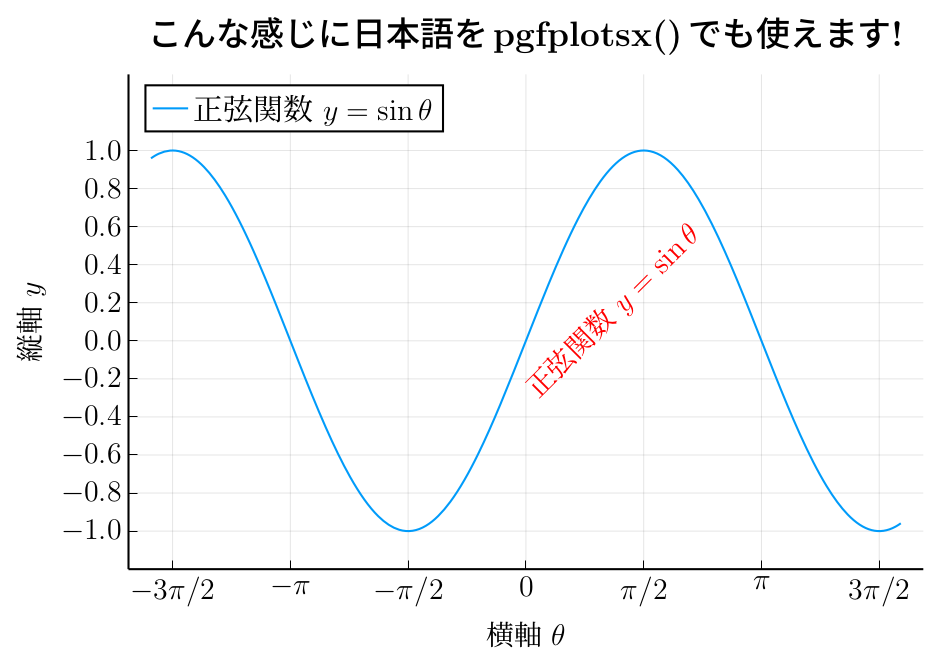

In [5]:
using LaTeXStrings
using Plots
default(fmt=:png)

pgfplotsx()
PGFPlotsX.CUSTOM_PREAMBLE=[raw"\usepackage{luatexja}"]
@eval Plots pgfx_sanitize_string(s::AbstractString) = s

# @eval Plots function original_pgfx_sanitize_string(s::AbstractString)
#     # regular latex text with the following special characters won't compile if not sanitized (escaped)
#     sanitized = replace(s, r"\\?([#%_&\{\}\$])" => s"\\\1")
#     map(collect(sanitized)) do c
#         if isascii(c)
#             c
#         else
#             Latexify.latexify(c; parse = false)
#         end
#     end |> join |> LaTeXString
# end
# @eval Plots pgfx_sanitize_string(s::AbstractString) = original_pgfx_sanitize_string(s)

plot(sin; label=raw"正弦関数 $y = \sin\theta$", legendfontsize=15)
plot!(xguide=raw"横軸 $\theta$", yguide=raw"縦軸 $y$", guidefontsize=14)
plot!(xtick=(-2π:π/2:2π, [L"-2\pi", L"-3\pi/2", L"-\pi", L"-\pi/2", L"0", L"\pi/2", L"\pi", L"3\pi/2", L"2\pi"]),
    ytick=-1:0.2:1, tickfontsize=14)
plot!(ylim=(-1.2, 1.4), legend=:topleft)
annotate!(0, -0.3, text(raw"正弦関数 $y = \sin\theta$", :left, 14, :red, rotation=45))
title!(raw"\textbf{こんな感じに日本語をpgfplotsx()でも使えます!}", titlefontsize=17)
plot!(tex_output_standalone=true)
savefig("pgfplotsx-ja-standalone.tex")
plot!()

In [6]:
; cat pgfplotsx-ja-standalone.tex

\RequirePackage{luatex85}
\documentclass[tikz]{standalone}
% Default preamble
\usepackage{pgfplots}
\pgfplotsset{compat=newest}
\usepgfplotslibrary{groupplots}
\usepgfplotslibrary{polar}
\usepgfplotslibrary{smithchart}
\usepgfplotslibrary{statistics}
\usepgfplotslibrary{dateplot}
\usepgfplotslibrary{ternary}
% Custom preamble from global variable:
\usepackage{luatexja}
\usetikzlibrary{arrows.meta}
\usetikzlibrary{backgrounds}
\usepgfplotslibrary{patchplots}
\usepgfplotslibrary{fillbetween}
\pgfplotsset{%
    layers/standard/.define layer set={%
        background,axis background,axis grid,axis ticks,axis lines,axis tick labels,pre main,main,axis descriptions,axis foreground%
    }{
        grid style={/pgfplots/on layer=axis grid},%
        tick style={/pgfplots/on layer=axis ticks},%
        axis line style={/pgfplots/on layer=axis lines},%
        label style={/pgfplots/on layer=axis descriptions},%
        legend style={/pgfplots/on layer=axis descriptions},%
        title style={/p